# Edge Detection
        Parham Nayeri

        APDANA

        OSTAD ZARE

mn be 3 ravesh zir edge detection ro anjam dadm :
1. SOBEL
2. PREWITT
3. Canny

# Import libraris

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Import Image

ma image ra vared kardim va dar yek np.array zakhire sazi kardim

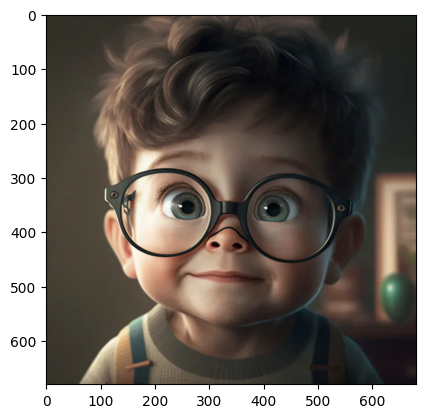

In [11]:
img = np.array(Image.open('img1.png'))
plt.imshow(img)

# SOBEL

filter Sobel yek matris 3x3 ast ke filter x va y an on nesbat be ham 90 daraje charkhide and va be komake in filter mitavand ektelaf shedat ro  shanaei ra tashkis dahad


![alternatvie text](sobel-filter.png)

Gradient magnitude : andaze gradian neshan dahandeye mizan taqirat dar shedat roshanaei ast ke ba formole zir bedast miayad (ma dar inja ba (gMagnitude)) namayesh dadeim

 
M =√(x^2+y^2)

In [12]:
def sobelKernel(img):
    x = np.array([[-1,0,1],
                  [-2,0,2],
                  [-1,0,1]])
    y = np.array([[1,2,1],
                  [0,0,0],
                  [-1,-2,-1]])
    if len(img.shape)==3:
        img = np.mean(img,axis=2)
    gradX = conv2d(img,x)
    gradY = conv2d(img,y)
    gMagnitude = np.sqrt(gradX**2+gradY**2)
    
    return gMagnitude

# PREWITT

Filter Prewitt hamande Sobel ast ba in tafavot domeqdare markazi az -2 va +2 be -1 va +1 taqir karde and 

![alternatvie text](prewitt-filters.png)

In [13]:
def prewittKernel(img):
    x = np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])
    y = np.array([[-1,-1,-1],
                  [0,0,0],
                  [1,1,1]])
    if len(img.shape)==3:
        img = np.mean(img,axis=2)
    gradX = conv2d(img,x)
    gradY = conv2d(img,y)
    gMagnitude = np.sqrt(gradX**2+gradY**2)
    
    return gMagnitude

# Canny

dar algorith Canny ebteda ba estefade filter gaussian noise ro hazf mikonim va sepas ba estefade az gilter Sibel gradian ro mohasebe karde va sepas ba estefade as thresh hold noqati ke qeyr az bishine hastand ra hazf mikonim va ham chenin labe haye zaif ra ba estefade az Hysteresis hazf mikonim marateb algorith be sharhe zir ast 

1. Kahesh Noise (Gaussian)
2. Sobel (Mohasebe Gradian)
3. Hazf Noqat Qeyre Bishine (non-maximum supperssion)
4. taein astane
5 . donabl kardan labe haye tasvir be raveshe pasmand (Hysteresis)

dar inja be dalil sangin va tolani bodane code Canny mn az OpenCV estefade kardam ke GaussianBlur baraye hazfe noise tasvir ast 

va cv2.canny baraye ejraye ma baqiye algorith canny estefade shode

low Threshold : in meqadar baraye shenasaei pixel haei estefade mishavad ke shedat roshanaei an ha kamtar az astane ast va be onvane pixel haye labe dar nazar grefte nemishavand

high Threshold : in meqdar baraye shenasaei pixel haye qavi ba shedate roshanaei bishtar az astane estefade mishavad

* tamame pixel haei ke shedat roshanei an beyne Low - High qarar darad be onvan pixel zaeif shenakhte shode va ba estefade az hystresis hazf shode in mozo dar khode method Canny baroye tasvir anjam mishavad

In [14]:
def cannyKernel(img,lowthresh,hightresh):
    blur = cv2.GaussianBlur(img,(5,5),0)
    edge = cv2.Canny(blur,lowthresh,hightresh)
    return edge

# Convolve 2D


baraye harkate 2D kernel roye tasvir va mohasebe ye adade hasel az in function estefade mishavad

In [15]:
def conv2d(img,kernel):
    kernel = np.flipud(np.fliplr(kernel))
    height,width = kernel.shape
    padding = np.pad(img,pad_width=((1,1),(1,1)),mode="constant",constant_values=0)
    outImg = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            outImg[i,j] = np.sum(padding[i:i+height,j:j+width]*kernel)
        
    return outImg

# Show Image In SOBEL

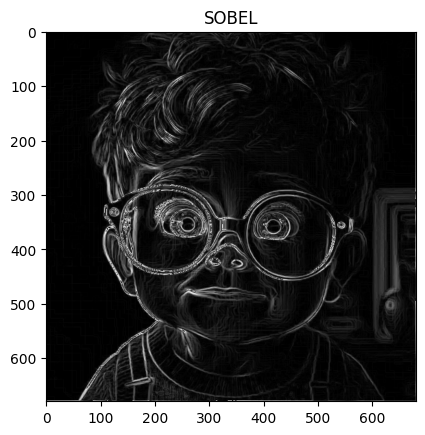

In [16]:
sobel = sobelKernel(img)
plt.title("SOBEL")
plt.imshow(sobel.astype(np.uint8), cmap='gray')

# Show Image In PREWITT

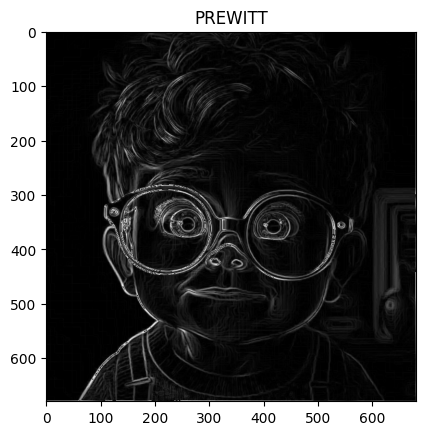

In [17]:
prew = prewittKernel(img)
plt.title("PREWITT")
plt.imshow(prew.astype(np.uint8),cmap="gray")

# Show Image In Canny

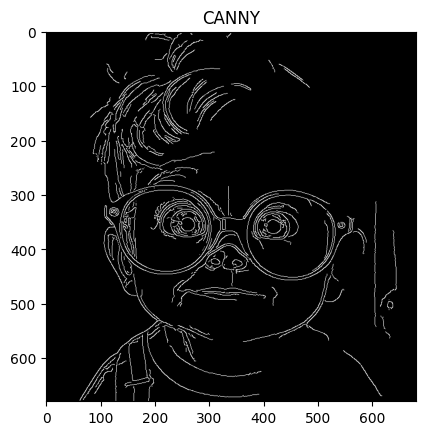

In [18]:
low_threshold = 30
high_threshold = 80
canny = cannyKernel(img,low_threshold,high_threshold)
plt.title("CANNY")
plt.imshow(canny.astype(np.uint8),cmap="gray")